<a href="https://colab.research.google.com/github/priorei/Introduction-to-applied-data-science/blob/master/Copy_of_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
from sklearn.datasets import fetch_openml
MNIST = fetch_openml('mnist_784',version=1,cache=True)

Splitting the data first 

## Find all 9s 

In [3]:
x = MNIST.data[:5000]
y = MNIST.target[:5000]

convert: 

0 to 8 -> 0 


9 -> 1

In [4]:
y = np.array(y,dtype='int')
y_bin = np.where(y!=9,0,y)
y_bin = np.where(y==9,1,y)

train/test split of 75% training and 25% testing. Data pre-processing step as well. 

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_bin,test_size=.25,random_state=42)

from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

1. Find the 9s using Logistic regression.

For consistency's sake, I used random state = 42 for my entire notebook so things do not vary every run. I used SAGA solver due to the size of the dataset. It uses L2 regularization, which is mean-based instead. Good for avoiding overfitting since I had to set the number of iterations to a high number. SAGA optimizes the sum of convex functions and converges faster by recording previous values. 

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=4000,solver='saga')
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)

"from sklearn.linear_model import LogisticRegression\nclf = LogisticRegression(random_state=42,max_iter=4000,solver='saga')\nclf.fit(x_train,y_train)\ny_predicted = clf.predict(x_test)"

In [9]:
from sklearn.metrics import accuracy_score
#print('Accuracy:', accuracy_score(y_test,y_predicted))

2. Find the 9s using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).

I reused this code snippet on my midterm project. I first plotted to see what the optimal k was with default parameters. Then, I followed the instructions to use KNN for Minkowski metrics at order (1, 2, 3) with uniform weights. The algorithm selected for KNN is set to use the one yielding the most accuracy. 

Text(0, 0.5, 'Accuracy')

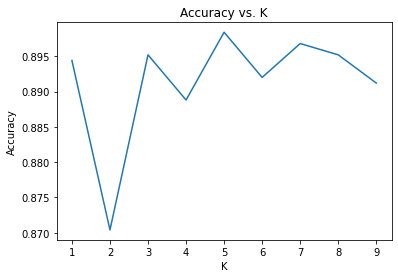

In [10]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_test)
    score = accuracy_score(y_test,y_predicted)
    scores.append(score)

plt.plot(np.arange(1,10),scores)
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')

order = 1

In [11]:
model = KNeighborsClassifier(weights='uniform', algorithm='auto', n_neighbors=5,p=1)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.9136


order = 2

In [12]:
model = KNeighborsClassifier(weights='uniform', algorithm='auto', n_neighbors=5,p=2)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.8984


order = 3

In [13]:
model = KNeighborsClassifier(weights='uniform', algorithm='auto', n_neighbors=5,p=3)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.86


3. Find the 9s using Support Vector Machines.

When using a linear SVC, the model would not converge. The following uses L2, which is mean-based. It tries to optimize a finite sum of convex functions while saving previous inputs, so it theoretically converges faster. 

In [14]:
from sklearn import svm 
clf = svm.SVC(random_state=42,max_iter=10000)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.9272


## Find every single digits!

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=42)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

1. Find the digits using Logistic regression and one-vs-rest for multi-class option.

The inituition for this was similar, except choosing parameters specified by the question 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,solver='saga',multi_class='ovr',max_iter=8000)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test,y_predicted))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_test)
    score = accuracy_score(y_test,y_predicted)
    scores.append(score)

plt.plot(np.arange(1,10),scores)
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')

2. Find the digits using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).

Same as first section 

order = 1

In [ ]:
model = KNeighborsClassifier(weights='uniform', algorithm='auto', n_neighbors=5,p=1)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

order = 2

In [ ]:
model = KNeighborsClassifier(weights='uniform', algorithm='auto', n_neighbors=5,p=2)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

order = 3

In [ ]:
model = KNeighborsClassifier(weights='uniform', algorithm='auto', n_neighbors=5,p=3)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

3. Find the digits using Support Vector Machines and one-vs-rest for multi-class option. 

This was the only model to support non-binary classification to my knowledge, so my choices were restricted here. 

In [ ]:
clf = svm.LinearSVC(random_state=42,max_iter=100000,multi_class='ovr')
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Unsurprisingly, binary classification performed more well than non-binary. It is easier to distinguish two clases with the same number of parameters as opposed to 10 classes with the same number of parameters. 